In [208]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [280]:
df_precificacao = pd.read_csv('teste_indicium_precificacao.csv')

# Pré-processamento de Dados

In [281]:
df_precificacao.head()

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


## Redução de Dimensionalidade
Aqui vamos remover colunas que não irão agregar informações relevantes para o modelo:
* id
* nome
* host_id

id é uma coluna com identificadores únicos para cada anúncio, portanto não existem um padrão por traz dessa feature que possa ser explorado. O mesmo vale para nome, host_id e host_nome.

In [282]:
df_precificacao.drop(columns=["id", "nome", "host_id"], inplace = True)
df_precificacao

,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48889,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48890,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48891,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48892,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


## Limpeza de Dados

### Valores Ausentes

In [283]:
df_precificacao.isnull().sum()

host_name                           21
bairro_group                         0
bairro                               0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimo_noites                        0
numero_de_reviews                    0
ultima_review                    10052
reviews_por_mes                  10052
calculado_host_listings_count        0
disponibilidade_365                  0
dtype: int64

In [284]:
df_precificacao.tail(10)

,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
48884,Kendall,Manhattan,East Harlem,40.79633,-73.93605,Private room,75,2,0,NaN,NaN,2,353
48885,Scott,Manhattan,Midtown,40.75561,-73.96723,Entire home/apt,200,6,0,NaN,NaN,1,176
48886,Melki,Brooklyn,Williamsburg,40.71232,-73.94220,Entire home/apt,170,1,0,NaN,NaN,3,365
48887,Kat,Manhattan,Hell's Kitchen,40.76392,-73.99183,Private room,125,4,0,NaN,NaN,1,31
48888,Michael,Queens,Jamaica,40.69137,-73.80844,Private room,65,1,0,NaN,NaN,2,163
48889,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48890,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48891,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48892,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48893,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


Como as colunas "ultima_review" e "reviews_por_mes" dependem do número de reviews, essas colunas acabam com NaNs quando o anúncio possui 0 reviews.

In [285]:
df_precificacao.loc[df_precificacao['numero_de_reviews'] == 0, 'reviews_por_mes'] = 0
df_precificacao.isnull().sum()

host_name                           21
bairro_group                         0
bairro                               0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimo_noites                        0
numero_de_reviews                    0
ultima_review                    10052
reviews_por_mes                      0
calculado_host_listings_count        0
disponibilidade_365                  0
dtype: int64

Como última reviews se trata de uma data, vamos converter o tipo dessa coluna para o tipo adequado:

In [286]:
df_precificacao["ultima_review"] = pd.to_datetime(df_precificacao["ultima_review"], errors="coerce")
df_precificacao.tail()

,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
48889,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaT,0.0,2,9
48890,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaT,0.0,2,36
48891,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaT,0.0,1,27
48892,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaT,0.0,6,2
48893,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaT,0.0,1,23


## Verificando Correlações

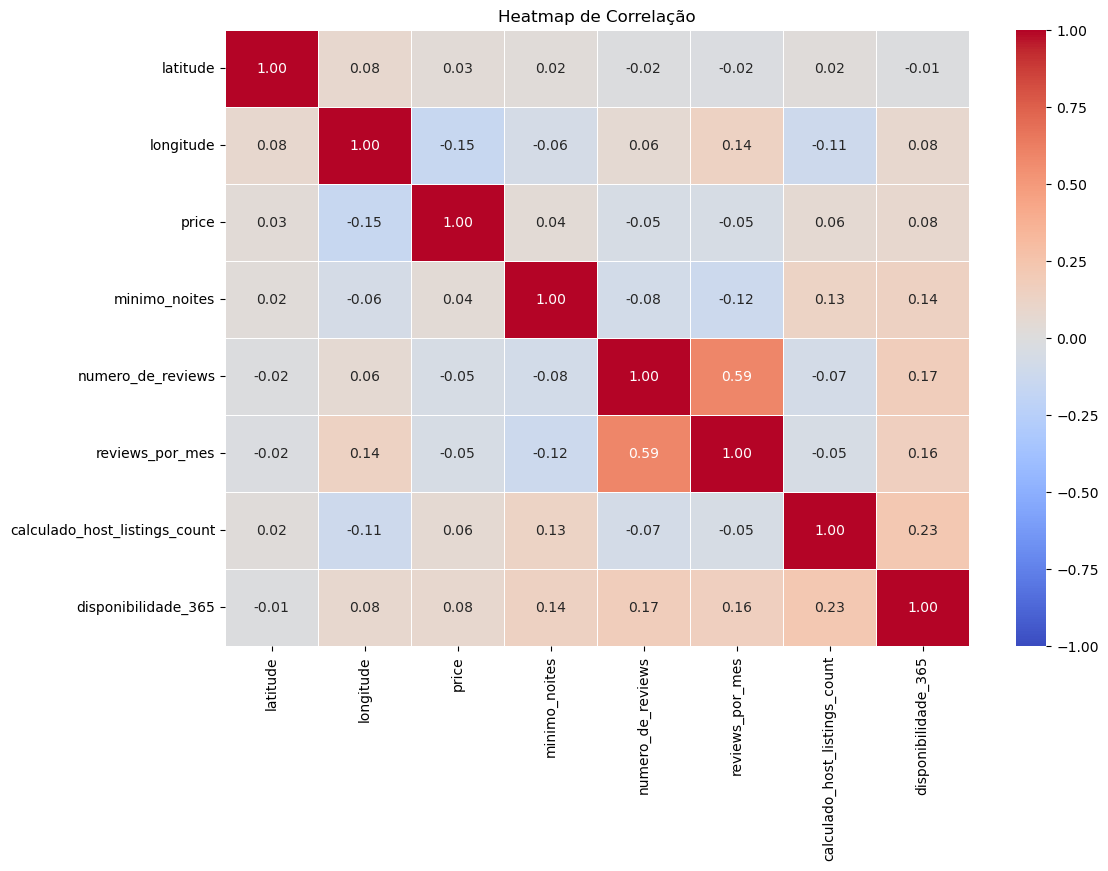

In [287]:
corr_matrix = df_precificacao.corr(numeric_only = True)
plt.figure(figsize=(12, 8))

sns.heatmap(corr_matrix, 
            annot=True,
            cmap="coolwarm",
            fmt=".2f",
            linewidths=0.5,
            vmin=-1, vmax=1)

plt.title("Heatmap de Correlação")
plt.show()

array([[<Axes: xlabel='price', ylabel='price'>,
        <Axes: xlabel='minimo_noites', ylabel='price'>,
        <Axes: xlabel='latitude', ylabel='price'>,
        <Axes: xlabel='longitude', ylabel='price'>,
        <Axes: xlabel='numero_de_reviews', ylabel='price'>,
        <Axes: xlabel='reviews_por_mes', ylabel='price'>,
        <Axes: xlabel='disponibilidade_365', ylabel='price'>],
       [<Axes: xlabel='price', ylabel='minimo_noites'>,
        <Axes: xlabel='minimo_noites', ylabel='minimo_noites'>,
        <Axes: xlabel='latitude', ylabel='minimo_noites'>,
        <Axes: xlabel='longitude', ylabel='minimo_noites'>,
        <Axes: xlabel='numero_de_reviews', ylabel='minimo_noites'>,
        <Axes: xlabel='reviews_por_mes', ylabel='minimo_noites'>,
        <Axes: xlabel='disponibilidade_365', ylabel='minimo_noites'>],
       [<Axes: xlabel='price', ylabel='latitude'>,
        <Axes: xlabel='minimo_noites', ylabel='latitude'>,
        <Axes: xlabel='latitude', ylabel='latitude'>,
    

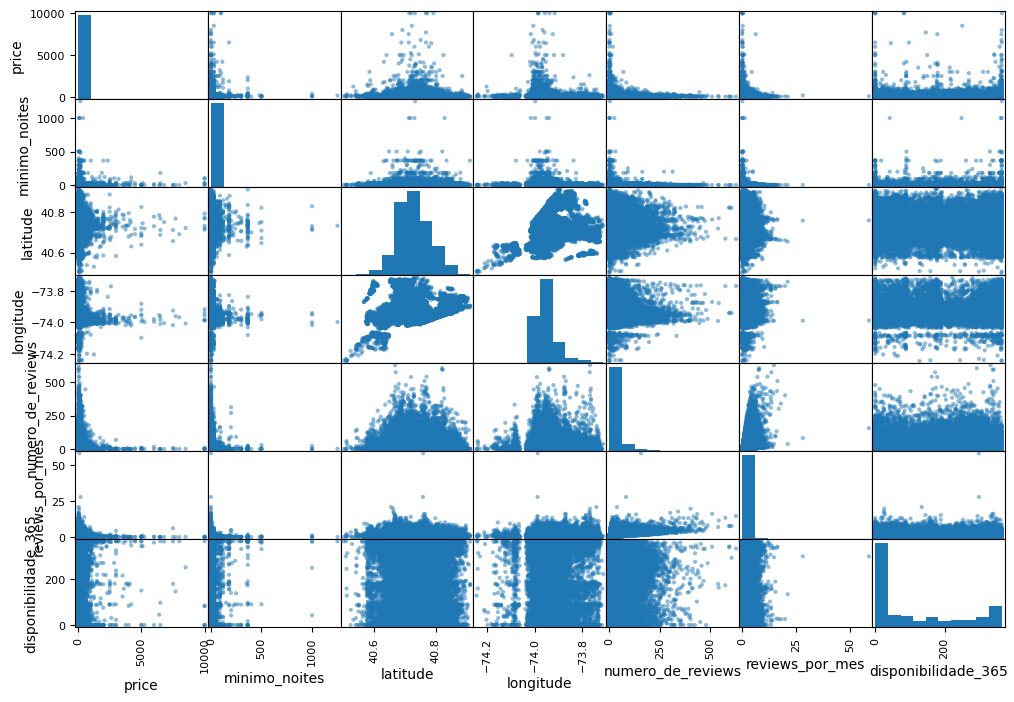

In [288]:
from pandas.plotting import scatter_matrix

atributos = ["price", "minimo_noites", "latitude", "longitude", "numero_de_reviews", "reviews_por_mes", "disponibilidade_365"]
scatter_matrix(df_precificacao[atributos], figsize=(12, 8))

## Identificação de Outliers

In [221]:
def outliers_iqr(grupo, colunas):
    for coluna in colunas:
        Q1 = grupo[coluna].quantile(0.25)
        Q3 = grupo[coluna].quantile(0.75)
        IQR = Q3 - Q1

        # Limites para outliers
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR

        # Criando uma flag de outlier
        grupo[f"outlier_{coluna}"] = (grupo[coluna] < limite_inferior) | (grupo[coluna] > limite_superior)
    return grupo

In [222]:
df_outliers = df_precificacao.groupby("bairro_group").apply(outliers_iqr, colunas=["price", "minimo_noites"])
df_sem_outliers = df_outliers[(df_outliers["outlier_price"] == False) & (df_outliers["outlier_minimo_noites"] == False)]
df_sem_outliers.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 39457 entries, ('Bronx', 170) to ('Staten Island', 48648)
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   host_name                      39438 non-null  object        
 1   bairro_group                   39457 non-null  object        
 2   bairro                         39457 non-null  object        
 3   latitude                       39457 non-null  float64       
 4   longitude                      39457 non-null  float64       
 5   room_type                      39457 non-null  object        
 6   price                          39457 non-null  int64         
 7   minimo_noites                  39457 non-null  int64         
 8   numero_de_reviews              39457 non-null  int64         
 9   ultima_review                  32799 non-null  datetime64[ns]
 10  reviews_por_mes                39457 non-null  flo

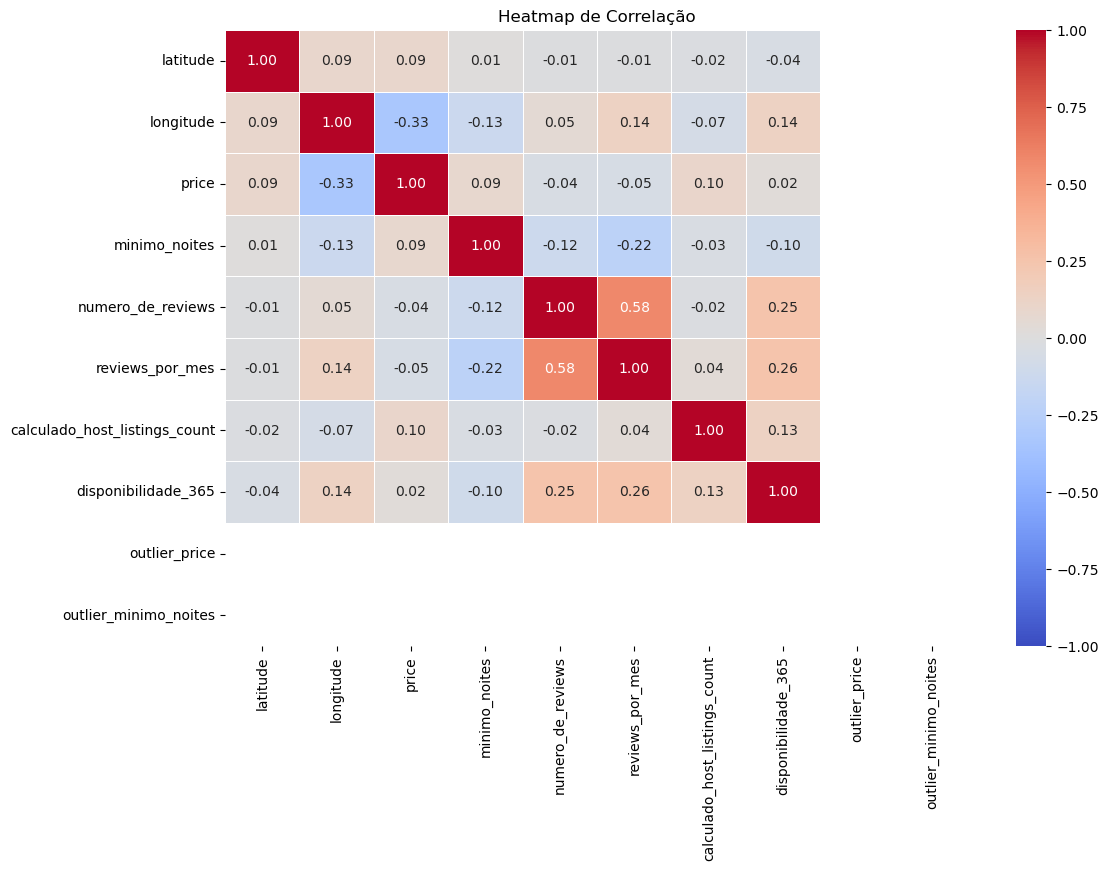

In [223]:
corr_matrix = df_sem_outliers.corr(numeric_only = True)
plt.figure(figsize=(12, 8))

sns.heatmap(corr_matrix, 
            annot=True,
            cmap="coolwarm",
            fmt=".2f",
            linewidths=0.5,
            vmin=-1, vmax=1)

plt.title("Heatmap de Correlação")
plt.show()

array([[<Axes: xlabel='price', ylabel='price'>,
        <Axes: xlabel='minimo_noites', ylabel='price'>],
       [<Axes: xlabel='price', ylabel='minimo_noites'>,
        <Axes: xlabel='minimo_noites', ylabel='minimo_noites'>]],
      dtype=object)

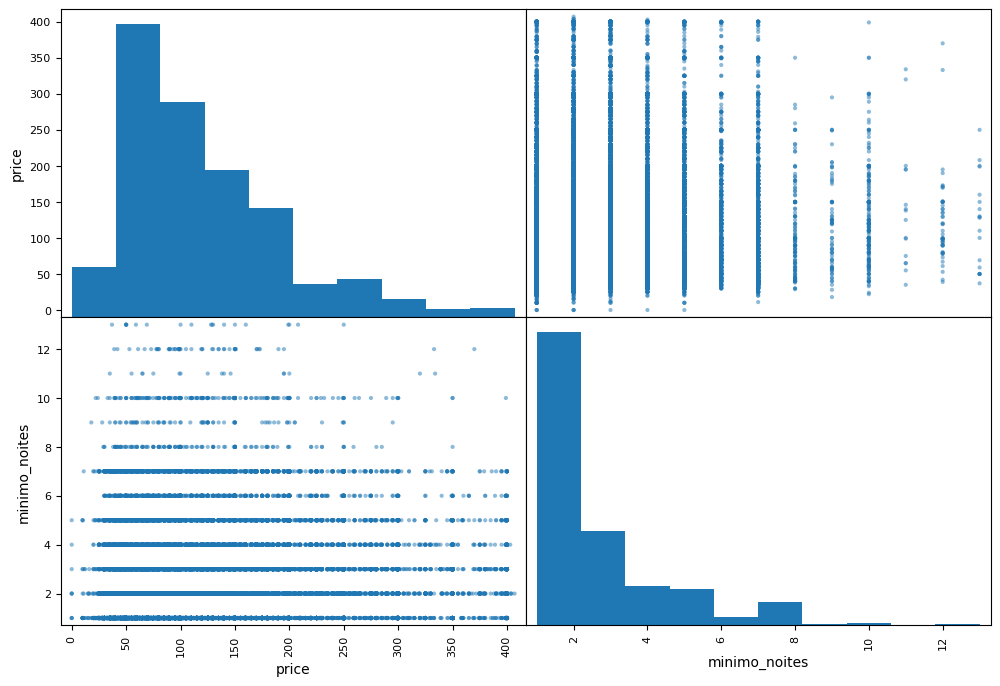

In [157]:
scatter_matrix(df_sem_outliers[atributos], figsize=(12, 8))

# Separação de Teste e Treino
Como a maioria das instancias estão concentradas em dois bairros(Manhattan e Brooklyn), é interessante realizar uma separação estratificada para evitar sampling bias

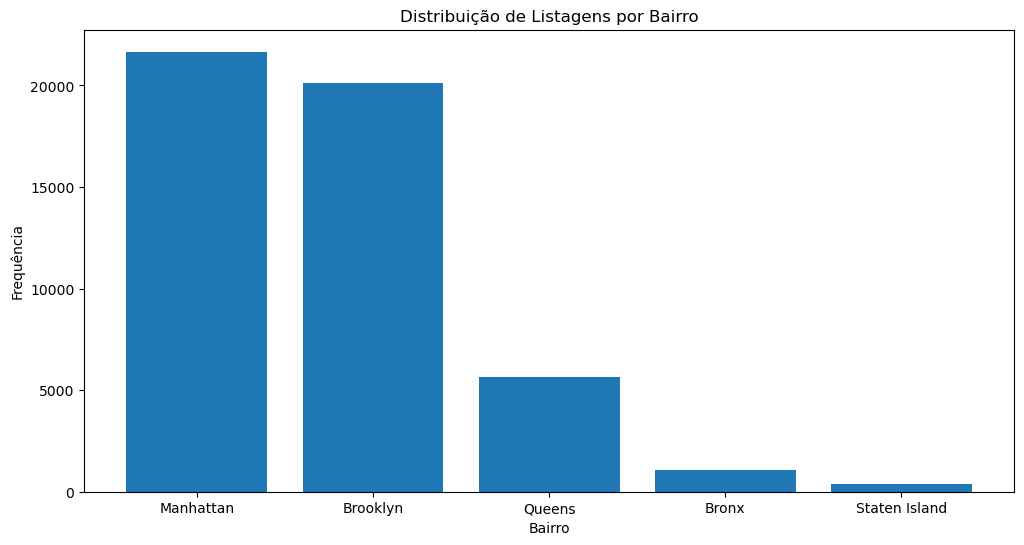

In [224]:
df_precificacao.drop(columns=["disponibilidade_365", 
                              "numero_de_reviews", "ultima_review", "reviews_por_mes", 
                              "host_name", "calculado_host_listings_count"], inplace=True)

contagem_bairros = df_precificacao["bairro_group"].value_counts()

plt.figure(figsize=(12, 6))
plt.bar(contagem_bairros.index, contagem_bairros.values)
plt.xlabel("Bairro")
plt.ylabel("Frequência")
plt.title("Distribuição de Listagens por Bairro")
plt.show()

In [250]:
from sklearn.model_selection import train_test_split

X = df_precificacao.drop(columns=["price"])
y = df_precificacao["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=df_precificacao["bairro_group"], random_state=42)

train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

## Encoding de Variáveis Categoricas

In [251]:
train_data

,bairro_group,bairro,latitude,longitude,room_type,minimo_noites,price
23650,Manhattan,Chelsea,40.74216,-73.99887,Entire home/apt,1,275
46896,Manhattan,Greenwich Village,40.72938,-73.99955,Entire home/apt,2,249
35636,Brooklyn,Bushwick,40.69297,-73.90427,Private room,2,65
18587,Manhattan,West Village,40.73316,-74.00782,Entire home/apt,4,300
34170,Manhattan,Chelsea,40.74309,-73.99535,Private room,55,115
...,...,...,...,...,...,...,...
3596,Manhattan,East Village,40.72767,-73.98825,Entire home/apt,1,850
5260,Manhattan,Hell's Kitchen,40.75882,-73.99168,Private room,1,99
12939,Manhattan,Washington Heights,40.85509,-73.93236,Private room,1,28
22463,Brooklyn,Park Slope,40.67259,-73.98452,Entire home/apt,1,300


In [259]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output=False).set_output(transform="pandas")
ohetransform = ohe.fit_transform(train_data[["bairro_group", "room_type"]])

train_data.drop(columns=["bairro_group", "room_type"], inplace=True)
train_data = pd.concat([train_data, ohetransform], axis=1)

train_data


,bairro,latitude,longitude,minimo_noites,price,bairro_group_Bronx,bairro_group_Brooklyn,bairro_group_Manhattan,bairro_group_Queens,bairro_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
23650,Chelsea,40.74216,-73.99887,1,275,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
46896,Greenwich Village,40.72938,-73.99955,2,249,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
35636,Bushwick,40.69297,-73.90427,2,65,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
18587,West Village,40.73316,-74.00782,4,300,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
34170,Chelsea,40.74309,-73.99535,55,115,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3596,East Village,40.72767,-73.98825,1,850,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
5260,Hell's Kitchen,40.75882,-73.99168,1,99,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
12939,Washington Heights,40.85509,-73.93236,1,28,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
22463,Park Slope,40.67259,-73.98452,1,300,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [261]:
ohe = OneHotEncoder(sparse_output=False).set_output(transform="pandas")
ohetransform = ohe.fit_transform(test_data[["bairro_group", "room_type"]])

test_data.drop(columns=["bairro_group", "room_type"], inplace=True)
test_data = pd.concat([test_data, ohetransform], axis=1)

test_data

,bairro,latitude,longitude,minimo_noites,price,bairro_group_Bronx,bairro_group_Brooklyn,bairro_group_Manhattan,bairro_group_Queens,bairro_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
42830,West Village,40.73261,-74.01043,2,120,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2921,Arverne,40.59684,-73.79449,2,35,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
38596,Upper West Side,40.78860,-73.96862,2,200,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
7426,Washington Heights,40.85396,-73.93785,20,75,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
12107,Upper West Side,40.77668,-73.97815,1,150,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37977,Hell's Kitchen,40.76203,-73.99353,3,600,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
39987,Greenpoint,40.73201,-73.95699,5,120,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
13113,Middle Village,40.71578,-73.87713,7,250,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
657,Crown Heights,40.67495,-73.95563,3,150,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [262]:
import category_encoders as ce

def target_encoding(data):
    encoder = ce.TargetEncoder(cols=['bairro'])
    df_encoded = encoder.fit_transform(data, data['price'])
    return df_encoded

In [263]:
train_data = target_encoding(train_data)
train_data

,bairro,latitude,longitude,minimo_noites,price,bairro_group_Bronx,bairro_group_Brooklyn,bairro_group_Manhattan,bairro_group_Queens,bairro_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
23650,249.498375,40.74216,-73.99887,1,275,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
46896,268.535256,40.72938,-73.99955,2,249,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
35636,84.751154,40.69297,-73.90427,2,65,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
18587,269.332800,40.73316,-74.00782,4,300,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
34170,249.498375,40.74309,-73.99535,55,115,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3596,184.761456,40.72767,-73.98825,1,850,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
5260,203.662791,40.75882,-73.99168,1,99,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
12939,88.608815,40.85509,-73.93236,1,28,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
22463,179.548148,40.67259,-73.98452,1,300,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [239]:
test_data = target_encoding(test_data)
test_data

,bairro,latitude,longitude,minimo_noites,price,bairro_group_Bronx,bairro_group_Brooklyn,bairro_group_Manhattan,bairro_group_Queens,bairro_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
42830,260.468050,40.73261,-74.01043,2,120,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2921,181.368422,40.59684,-73.79449,2,35,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
38596,219.906736,40.78860,-73.96862,2,200,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
7426,93.815043,40.85396,-73.93785,20,75,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
12107,219.906736,40.77668,-73.97815,1,150,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37977,209.065854,40.76203,-73.99353,3,600,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
39987,179.605000,40.73201,-73.95699,5,120,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
13113,140.757166,40.71578,-73.87713,7,250,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
657,106.910891,40.67495,-73.95563,3,150,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [240]:
X_train = train_data.drop(columns=["price"])
y_train = train_data["price"]

X_test = test_data.drop(columns=["price"])
y_test = test_data["price"]

# Seleção e Treinamento de Modelos
Para prever o preço a partir dos dados, inicialmente realizamos uma análise exploratória para entender as variáveis disponíveis e sua relação com a variável alvo (price). As variáveis utilizadas incluíram características como localização (bairro_group, bairro, latitude, longitude), tipo de acomodação (room_type), e requisitos mínimos da estadia (minimo_noites).

Transformações
* Variáveis categóricas (bairro_group, bairro, room_type) foram transformadas em variáveis numéricas usando One-Hot Encoding, já a variável bairro foi transformada utilizando target encoding

Tipo de Problema
Esse é um problema de regressão, pois o objetivo é prever um valor numérico contínuo (price), em vez de uma categoria discreta.

Modelo Escolhido e Justificativa
Após testar diversos modelos, o Gradient Boosting Regressor apresentou o melhor desempenho. Esse modelo se destaca por sua capacidade de capturar padrões não lineares e interações entre variáveis, ajustando-se bem aos dados.

Foram utilizadas as métricas MAE, MSE e R2.

In [241]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [242]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Support Vector Machine": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor()
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {"MAE": mae, "MSE": mse, "R2": r2}
    
    print(f"{name} Results:")
    print(f"  MAE: {mae:.4f}")
    print(f"  MSE: {mse:.4f}")
    print(f"  R2 Score: {r2:.4f}\n")

Linear Regression Results:
  MAE: 74.5709
  MSE: 58970.2510
  R2 Score: 0.0976

Decision Tree Results:
  MAE: 98.3499
  MSE: 94454.3863
  R2 Score: -0.4453

Random Forest Results:
  MAE: 78.5160
  MSE: 60094.4845
  R2 Score: 0.0804

Gradient Boosting Results:
  MAE: 72.1829
  MSE: 58621.1522
  R2 Score: 0.1030

Support Vector Machine Results:
  MAE: 76.4149
  MSE: 63178.1926
  R2 Score: 0.0332

K-Nearest Neighbors Results:
  MAE: 90.0077
  MSE: 68930.3322
  R2 Score: -0.0548



In [244]:
model_gb = GradientBoostingRegressor()
model_gb.fit(X_train, y_train)

GradientBoostingRegressor()

In [276]:
x = {
 'bairro': [281.010392],
 'latitude': [40.75362],
 'longitude': [-73.98377],
 'minimo_noites': [1],
 "bairro_group_Bronx" : [0],
 "bairro_group_Brooklyn" : [0],
 "bairro_group_Manhattan" : [1],
 "bairro_group_Queens" : [0],
 "bairro_group_Staten Island" : [0],
 "room_type_Entire home/apt" : [1],
 "room_type_Private room" : [0],
 "room_type_Shared room" : [0]
  }

x = pd.DataFrame(x)
x

,bairro,latitude,longitude,minimo_noites,bairro_group_Bronx,bairro_group_Brooklyn,bairro_group_Manhattan,bairro_group_Queens,bairro_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,281.010392,40.75362,-73.98377,1,0,0,1,0,0,1,0,0


In [277]:
y_pred = model_gb.predict(x)
y_pred

array([338.20107082])

In [278]:
import pickle

with open("modelo.pkl", "wb") as f:
    pickle.dump(model_gb, f)